In [ ]:
!pip install nltk matplotlib seaborn langdetect imbalanced-learn streamlit  pyngrok
!pip install wordcloud
!pip install --upgrade nlpaug transformers sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 102.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.9 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=c8c557baf2669eb72afc9fbd8fb35b1446b84e8d0ae1d8127ca5d3421bfbcfad
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 98.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1


In [ ]:
# Load dataset
import pandas as pd

df = pd.read_csv('/content/chatgpt_review_dataset.csv')
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-12-24,East list local interesting far magazine father.,Impressive natural language understanding. Alm...,1,darren55,25,9,Google Play,de,Nepal,2.0.4,No
1,2024-07-26,Road determine picture figure hard experience ...,Sometimes gives wrong answers or outdated info...,2,davistyler,35,14,Flipkart,es,Panama,2.6.5,No
2,2024-08-22,Policy social past analysis whole.,Great tool for generating content quickly. Int...,5,andrea59,94,10,App Store,es,Denmark,4.2.2,No
3,2025-04-24,News financial billion four foreign.,Great tool for generating content quickly. Sta...,3,dcooper,50,15,Amazon,de,Brunei Darussalam,4.4.2,No
4,2024-08-15,To skill she case sing stop likely.,Excellent for language translation and grammar...,1,christine79,33,11,Flipkart,fr,United States Minor Outlying Islands,5.1.1,Yes


In [ ]:
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               50 non-null     object
 1   title              50 non-null     object
 2   review             50 non-null     object
 3   rating             50 non-null     int64 
 4   username           50 non-null     object
 5   helpful_votes      50 non-null     int64 
 6   review_length      50 non-null     int64 
 7   platform           50 non-null     object
 8   language           50 non-null     object
 9   location           50 non-null     object
 10  version            50 non-null     object
 11  verified_purchase  50 non-null     object
dtypes: int64(3), object(9)
memory usage: 4.8+ KB


In [ ]:
df.isnull().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [ ]:
import nltk
nltk.download('punkt')        # for word_tokenize
nltk.download('punkt_tab')
nltk.download('stopwords')   # for stopwords
nltk.download('wordnet')     # for lemmatizer
nltk.download('omw-1.4')
from langdetect import detect, DetectorFactory

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0


# Test everything
print("Stopwords example:", stopwords.words('english')[:5])
print("Tokenize test:", word_tokenize("ChatGPT is amazing!"))
print("Lemmatizer test:", WordNetLemmatizer().lemmatize("running"))
print("Language detect:", detect("This is an English sentence."))

Stopwords example: ['a', 'about', 'above', 'after', 'again']
Tokenize test: ['ChatGPT', 'is', 'amazing', '!']
Lemmatizer test: running
Language detect: en


In [ ]:
# ==============================================
#  TEXT PREPROCESSING
# ==============================================

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from langdetect import detect, DetectorFactory

# Fix seed for language detection consistency
DetectorFactory.seed = 0

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


# ------------------------------------------------
# ✅ Clean text function
# ------------------------------------------------
def clean_text(text):
    if pd.isnull(text):
        return ""

    # 1️⃣ Convert to lowercase
    text = text.lower()

    # 2️⃣ Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)

    # 3️⃣ Remove special characters, punctuation, numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # 4️⃣ Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()

    # 5️⃣ Tokenization
    tokens = word_tokenize(text)

    # 6️⃣ Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 7️⃣ Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # 8️⃣ Join back to a single string
    return ' '.join(tokens)


# ------------------------------------------------
# Language detection (keep English only)
# ------------------------------------------------
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False


# ==============================================
# 🧾 APPLY PREPROCESSING TO DATAFRAME
# ==============================================

# Example: read your dataset
df = pd.read_csv('/content/chatgpt_review_dataset.csv')

# Handle missing values
df.dropna(subset=['review'], inplace=True)

#  Keep only English reviews
df = df[df['review'].apply(is_english)]

# Apply text cleaning
df['cleaned_text'] = df['review'].apply(clean_text)

# Show results
print(df[['review', 'cleaned_text']].head())

# Save preprocessed data if needed
df.to_csv('cleaned_chatgpt_reviews.csv', index=False)
print("✅ Preprocessing completed and saved as 'cleaned_chatgpt_reviews.csv'")


                                              review  \
0  Impressive natural language understanding. Alm...   
1  Sometimes gives wrong answers or outdated info...   
2  Great tool for generating content quickly. Int...   
3  Great tool for generating content quickly. Sta...   
4  Excellent for language translation and grammar...   

                                        cleaned_text  
0  impressive natural language understanding almo...  
1  sometimes give wrong answer outdated info stud...  
2  great tool generating content quickly interest...  
3  great tool generating content quickly start me...  
4  excellent language translation grammar fix pri...  
✅ Preprocessing completed and saved as 'cleaned_chatgpt_reviews.csv'


In [ ]:
# Convert rating to sentiment
def rating_to_sentiment(rating):
    if rating >= 4:
        return 'Positive'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)
df['sentiment'].value_counts()

,count
sentiment,
Negative,20
Positive,17
Neutral,13


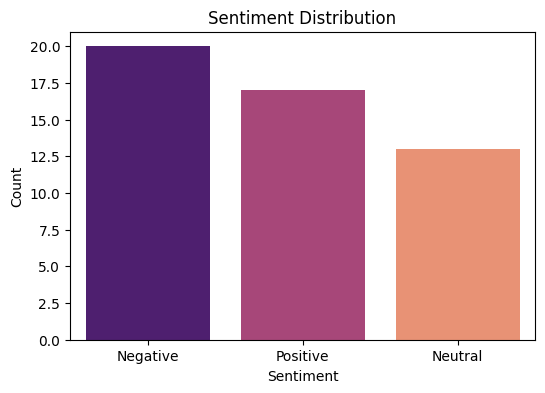

In [ ]:
# Plotting Sentiment Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', hue='sentiment',data=df, palette='magma')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
# Percentage distribution
sentiment_counts = df['sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)

sentiment
Negative    40.0
Positive    34.0
Neutral     26.0
Name: proportion, dtype: float64


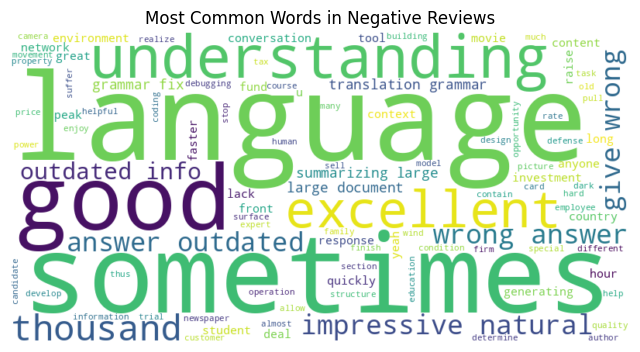

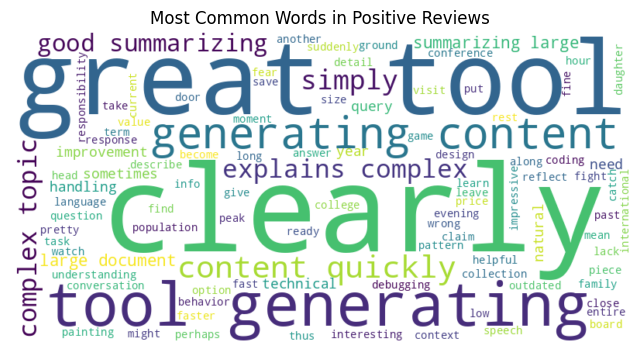

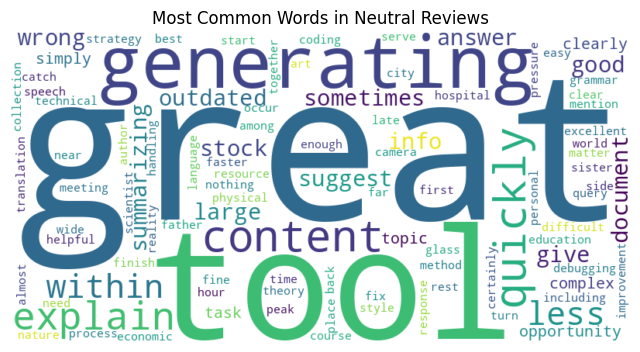

In [ ]:
# Word cloud for each sentiment

from wordcloud import WordCloud

for label in df['sentiment'].unique():
    text = ' '.join(df[df['sentiment'] == label]['cleaned_text'])
    wc = WordCloud(width=800, height=400, background_color='white',
                   colormap='viridis', max_words=100).generate(text)
    plt.figure(figsize=(8,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Common Words in {label} Reviews')
    plt.show()

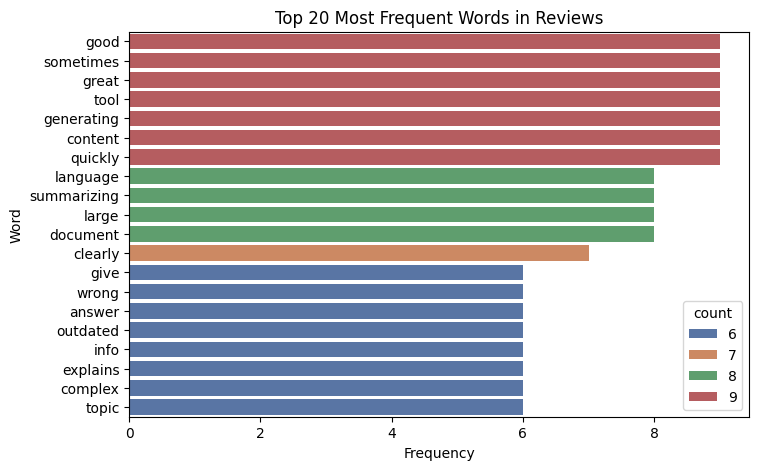

In [ ]:
# Histogram for most frequent word

from collections import Counter
import pandas as pd

# Combine all cleaned text
all_words = ' '.join(df['cleaned_text']).split()

# Count most common 20 words
common_words = Counter(all_words).most_common(20)
words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot histogram
plt.figure(figsize=(8,5))
sns.barplot(x='count',hue='count', y='word', data=words_df, palette='deep')
plt.title('Top 20 Most Frequent Words in Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


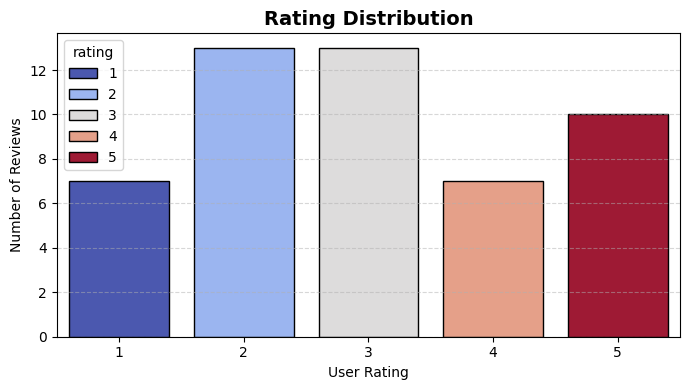

In [ ]:
#Rating Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(x='rating', hue='rating', data=df, palette='coolwarm', edgecolor='black')

plt.title("Rating Distribution", fontsize=14, weight='bold')
plt.xlabel("User Rating")
plt.ylabel("Number of Reviews")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

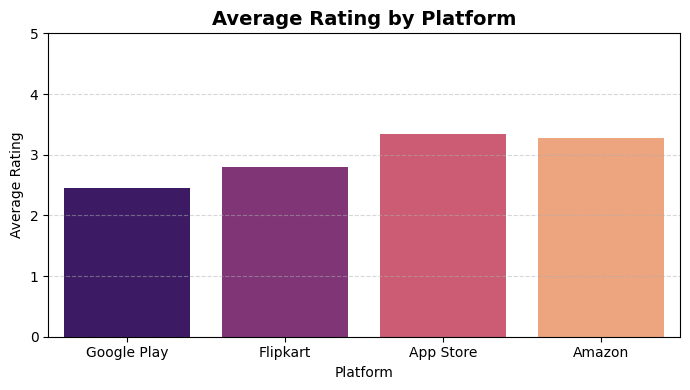

In [ ]:
# Average Rating by platform
plt.figure(figsize=(7,4))
sns.barplot(x='platform',hue='platform', y='rating', data=df, palette='magma', estimator='mean', errorbar=None)

plt.title("Average Rating by Platform", fontsize=14, weight='bold')
plt.xlabel("Platform")
plt.ylabel("Average Rating")
plt.ylim(0, 5)  # since ratings are usually 1–5
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

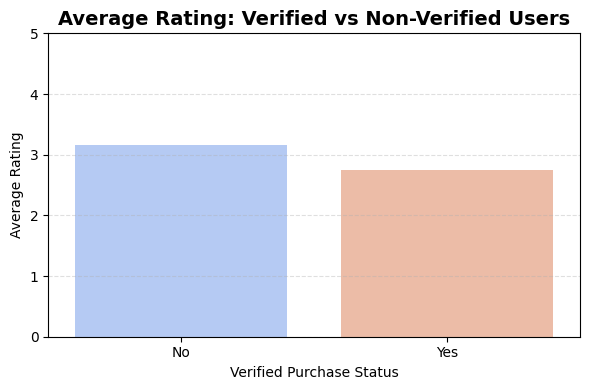

In [ ]:
#Average Rating by Verified Status

plt.figure(figsize=(6,4))
sns.barplot(x='verified_purchase',hue='verified_purchase', y='rating', data=df,
            palette='coolwarm', estimator='mean', errorbar=None)

plt.title("Average Rating: Verified vs Non-Verified Users", fontsize=14, weight='bold')
plt.xlabel("Verified Purchase Status")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

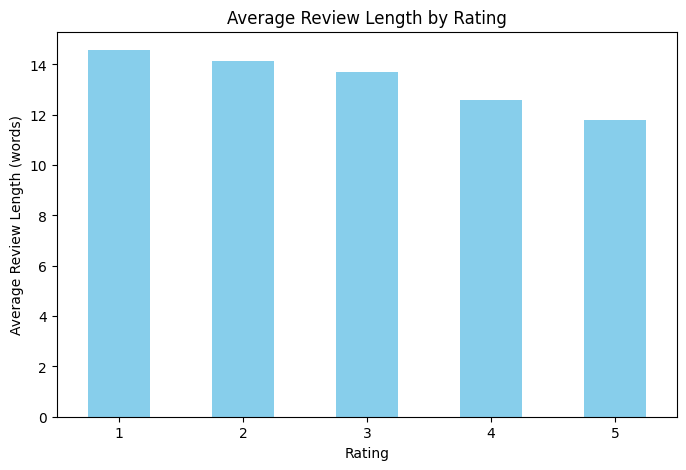

In [ ]:
#Review length by rating
import pandas as pd
import matplotlib.pyplot as plt

# Group by rating and calculate average review length
avg_length_by_rating = df.groupby('rating')['review_length'].mean()

# Plot bar chart
plt.figure(figsize=(8,5))
avg_length_by_rating.plot(kind='bar', color='skyblue')
plt.title("Average Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Average Review Length (words)")
plt.xticks(rotation=0)
plt.show()

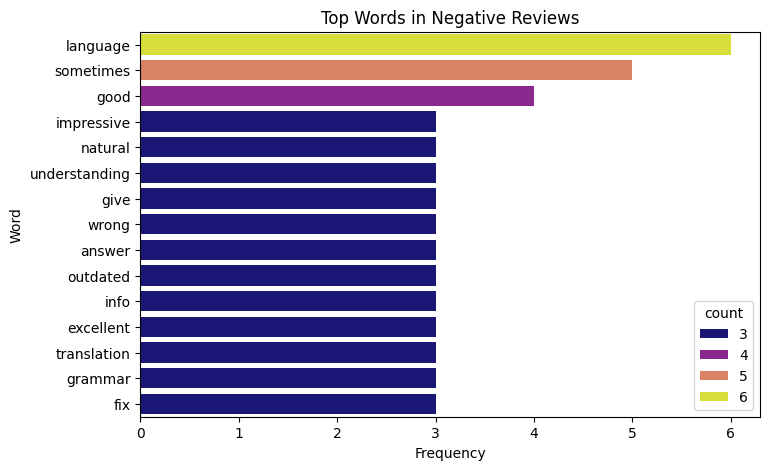

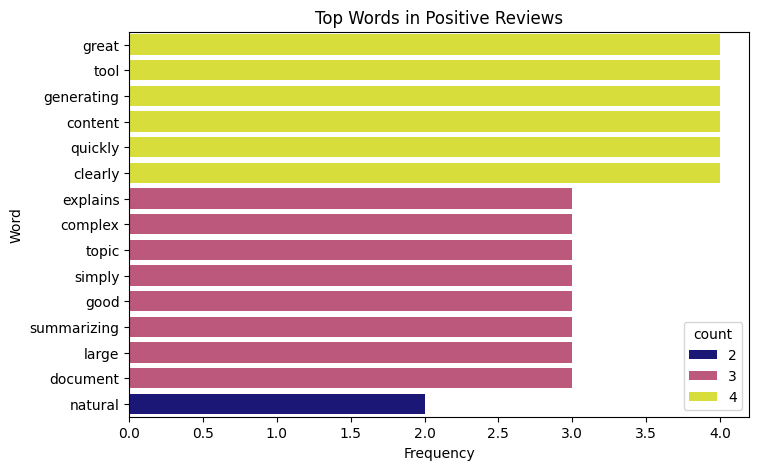

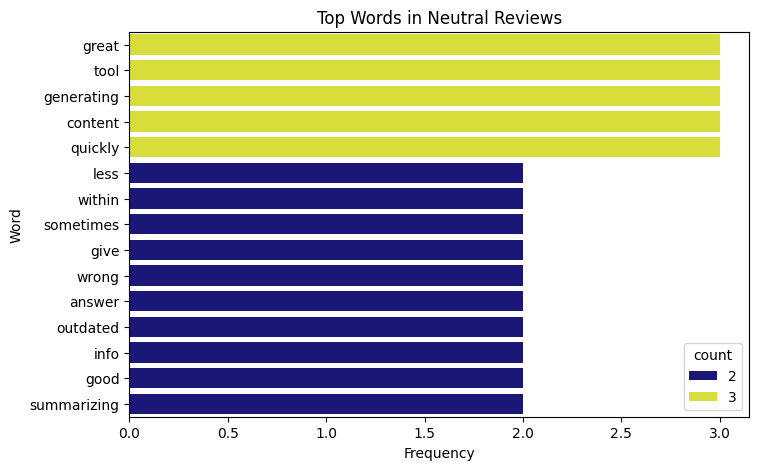

In [ ]:
# Sentiment-wise Word Frequency Visualization

from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each sentiment category
for label in df['sentiment'].unique():
    # Combine all words for this sentiment
    text = ' '.join(df[df['sentiment'] == label]['cleaned_text']).split()

    # Get top 15 most frequent words
    common_words = Counter(text).most_common(15)
    words_df = pd.DataFrame(common_words, columns=['word', 'count'])

    # Plot histogram
    plt.figure(figsize=(8,5))
    sns.barplot(x='count',hue='count', y='word', data=words_df, palette='plasma')
    plt.title(f'Top Words in {label} Reviews')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

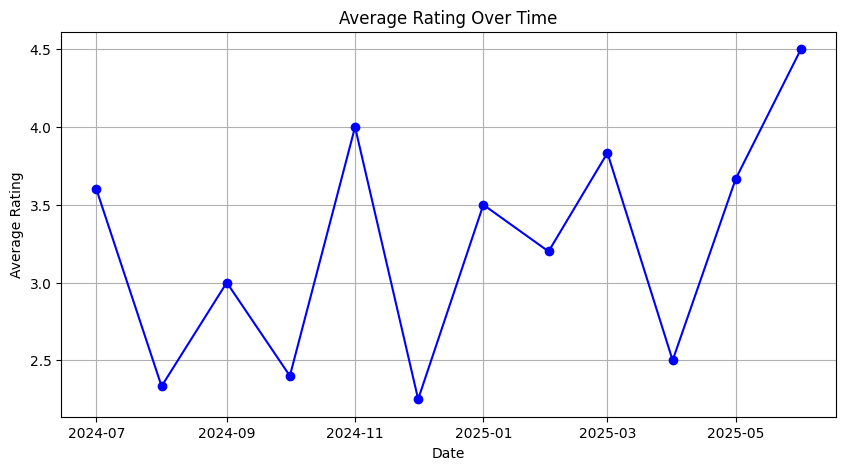

In [ ]:
#Average Rating over time
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'date' column is datetime
df['date'] = pd.to_datetime(df['date'])

# Group by date and calculate average rating
avg_rating = df.groupby(df['date'].dt.to_period('M'))['rating'].mean()

# Convert PeriodIndex to datetime for plotting
avg_rating.index = avg_rating.index.to_timestamp()

# Plot line chart
plt.figure(figsize=(10,5))
plt.plot(avg_rating.index, avg_rating.values, marker='o', color='blue')
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

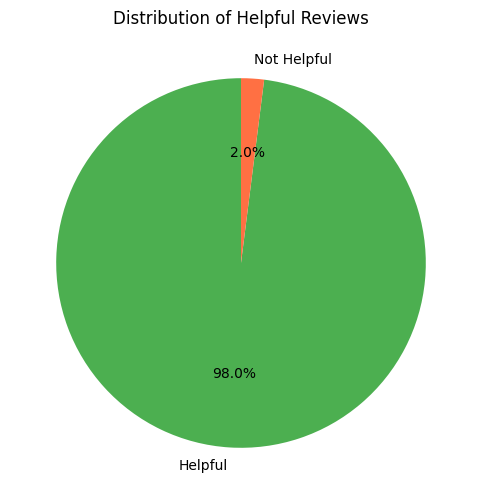

In [ ]:
#Helpful votes
import matplotlib.pyplot as plt

# Helpful flag: 1 = Helpful (votes > 10), 0 = Not Helpful
df['helpful_flag'] = df['helpful_votes'].apply(lambda x: 1 if x > 10 else 0)

# Count helpful vs not helpful
helpful_counts = df['helpful_flag'].value_counts()

# Map numeric flag to text labels
label_map = {1: 'Helpful', 0: 'Not Helpful'}
labels = [label_map[i] for i in helpful_counts.index]

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(helpful_counts,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=['#4CAF50','#FF7043'])
plt.title('Distribution of Helpful Reviews')
plt.show()

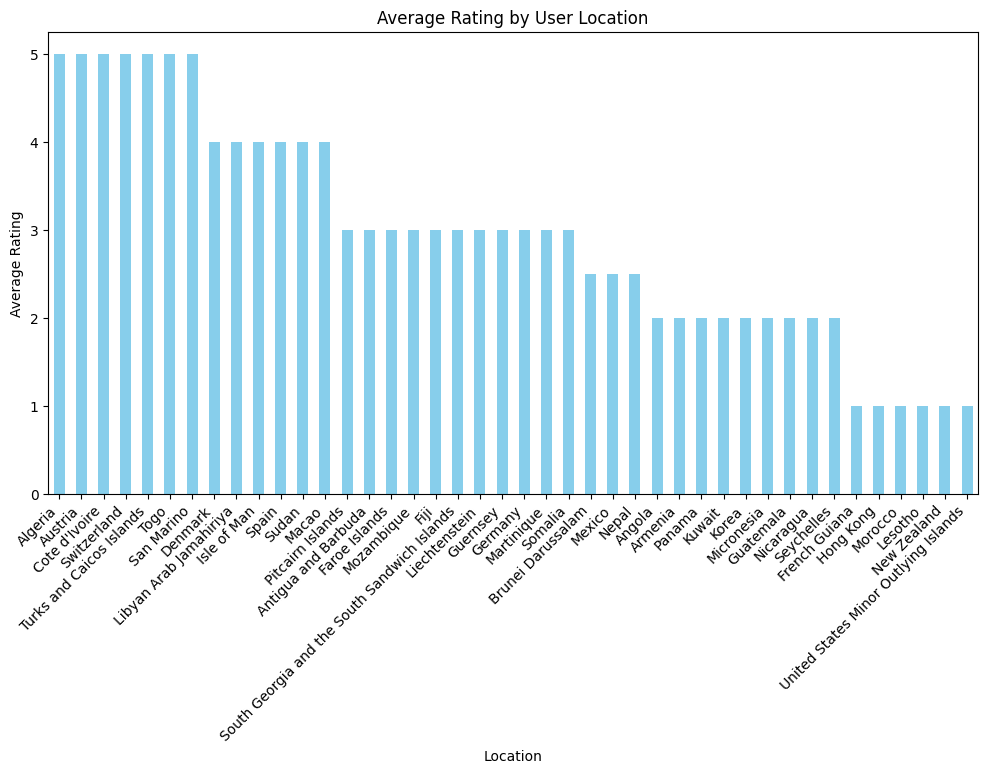

In [ ]:
#Average Rating by user location
import pandas as pd
import matplotlib.pyplot as plt

# Group by location and calculate average rating
avg_rating_by_location = df.groupby('location')['rating'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
avg_rating_by_location.plot(kind='bar', color='skyblue')
plt.title("Average Rating by User Location")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()

/tmp/ipython-input-4263438906.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


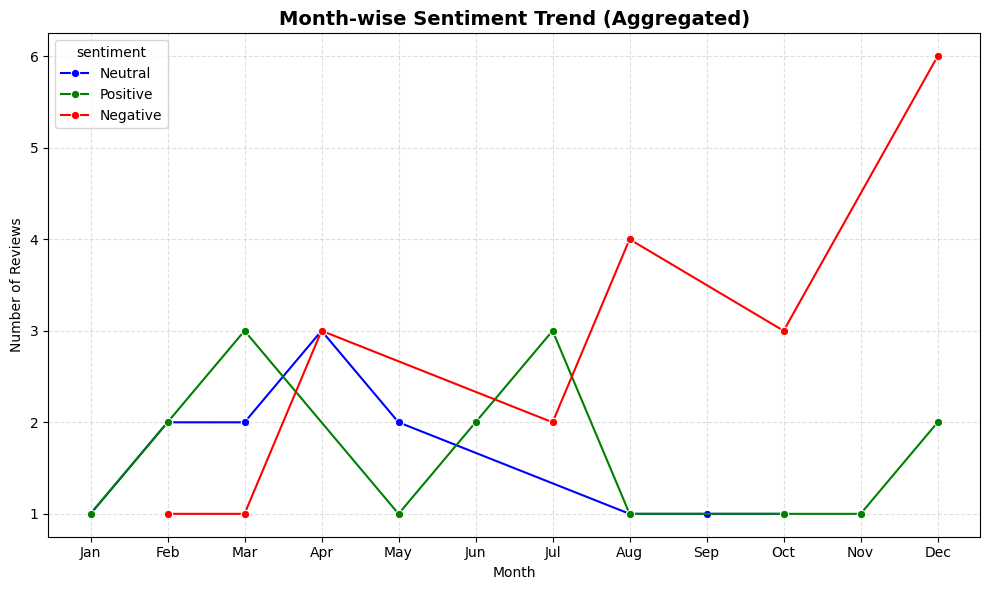

In [ ]:
# sentiment distribution trends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure date column is datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop missing dates
df = df.dropna(subset=['date'])

# Extract only month names (Jan, Feb, Mar, ...)
df['month'] = df['date'].dt.strftime('%b')

# Order months correctly (not alphabetically)
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Group by month and sentiment
month_trend = df.groupby(['month', 'sentiment']).size().reset_index(name='count')

# Ensure correct month order
month_trend['month'] = pd.Categorical(month_trend['month'], categories=month_order, ordered=True)
month_trend = month_trend.sort_values('month')

# Plot month-wise sentiment trend
plt.figure(figsize=(10,6))
sns.lineplot(
    data=month_trend,
    x='month',
    y='count',
    hue='sentiment',
    marker='o',
    palette={'Positive':'green', 'Negative':'red', 'Neutral':'blue'},
    estimator='mean',
    ci=None
)

plt.title('Month-wise Sentiment Trend (Aggregated)', fontsize=14, weight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [ ]:
###fully corrected - MiniLM + SBERT + Logistic Regression
# ===============================================================
#  IMPORTS
# ===============================================================
import pandas as pd
import numpy as np
import re
import nltk
from langdetect import detect
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlpaug.augmenter.sentence as nas

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, accuracy_score


from sentence_transformers import SentenceTransformer
import nlpaug.augmenter.word as naw

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# ===============================================================
# REQUIRED FUNCTIONS
# ===============================================================
def is_english(text):
    try:
        return detect(text) == "en"
    except:
        return False

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

# ===============================================================
#  LOAD YOUR DATA
# ===============================================================
DATA_PATH = "/content/chatgpt_review_dataset.csv"

df = pd.read_csv(DATA_PATH)
df = df.dropna(subset=["review", "rating"])
df = df[df["review"].apply(is_english)].reset_index(drop=True)

df["cleaned_text"] = df["review"].apply(clean_text)
df["cleaned_text"] = df["cleaned_text"].astype(str).str.strip()
df = df[df["cleaned_text"].str.len() > 0].reset_index(drop=True)

# Create sentiment from rating if missing
if "sentiment" not in df.columns:
    def rating_to_sentiment(r):
        try:
            r = float(r)
        except:
            return None
        if r >= 4:
            return "Positive"
        elif r == 3:
            return "Neutral"
        else:
            return "Negative"
    df["sentiment"] = df["rating"].apply(rating_to_sentiment)

df = df.dropna(subset=["sentiment"]).reset_index(drop=True)
print("Original distribution:\n", df["sentiment"].value_counts(), "\n")

# ------------------------------------------
#  AUGMENTATION (Safe Contextual + SBERT)
# ------------------------------------------

aug1 = naw.ContextualWordEmbsAug(
    model_path="bert-base-uncased",
    action="substitute",
    aug_p=0.25

)

aug2 = naw.ContextualWordEmbsAug(
    model_path="bert-base-uncased",
    action="insert",
    aug_p=0.15

)

para_aug = naw.SynonymAug(
    model_path="sentence-transformers/paraphrase-MiniLM-L6-v2"

)

aug_texts, aug_labels = [], []

def to_clean_string(x):
    """Convert any augmentation output into a valid cleaned string"""
    if isinstance(x, list):
        x = " ".join(map(str, x))
    if not isinstance(x, str):
        return ""
    return x.strip()

for i, row in df.iterrows():
    text = row["cleaned_text"]
    label = row["sentiment"]
    for augmenter in [aug1, aug2, para_aug]:
        try:
            out = augmenter.augment(text)
            clean_out = to_clean_string(out)
            if clean_out and len(clean_out) > 3:
                aug_texts.append(clean_out)
                aug_labels.append(label)
        except:
            pass

aug_df = pd.DataFrame({"cleaned_text": aug_texts, "sentiment": aug_labels})
df_final = pd.concat([df, aug_df], ignore_index=True)

df_final["cleaned_text"] = df_final["cleaned_text"].astype(str).str.strip()
df_final = df_final[df_final["cleaned_text"].str.len() > 0].reset_index(drop=True)

print("\nFinal counts after augmentation:\n")
print(df_final["sentiment"].value_counts())

# ===============================================================
#  LABEL ENCODING
# ===============================================================
le = LabelEncoder()
df_final["label"] = le.fit_transform(df_final["sentiment"])
print("\nLabel mapping:", dict(zip(le.transform(le.classes_), le.classes_)))

# ===============================================================
#  TRAIN/TEST SPLIT
# ===============================================================
X_train, X_test, y_train, y_test = train_test_split(
    df_final["cleaned_text"], df_final["label"],
    test_size=0.2, stratify=df_final["label"], random_state=42
)

# ===============================================================
#  EMBEDDINGS (MiniLM)
# ===============================================================
embedder = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
X_train_vec = embedder.encode(X_train.tolist(), convert_to_numpy=True, show_progress_bar=True)
X_test_vec = embedder.encode(X_test.tolist(), convert_to_numpy=True, show_progress_bar=True)

# ===============================================================
#  CLASSIFIER + CALIBRATION
# ===============================================================
clf = LogisticRegression(
    max_iter=2000,
    class_weight="balanced",
    multi_class="ovr"
)
calibrated_clf = CalibratedClassifierCV(clf, method="sigmoid")
calibrated_clf.fit(X_train_vec, y_train)

# ===============================================================
#  EVALUATION
# ===============================================================
preds = calibrated_clf.predict(X_test_vec)
probs = calibrated_clf.predict_proba(X_test_vec)

print("\nClassification Report:\n",
      classification_report(y_test, preds, target_names=le.classes_))

print(f"\n🎯 Accuracy: {accuracy_score(y_test, preds)*100:.2f}%")
print("Macro F1:", f1_score(y_test, preds, average="macro"))
print("ROC-AUC:", roc_auc_score(y_test, probs, multi_class="ovr"))

# ===============================================================
#  HYBRID NEUTRAL-SAFE DECISION ENGINE (REVISED)
# ===============================================================
PROBA_UNCERTAIN = 0.50          # below this, call Neutral
NEU_MARGIN = 0.20               # |neg - pos| closeness for Neutral
NEU_MIN = 0.15                  # minimal neutral proba to allow Neutral
NEU_TOP_GAP = 0.10              # if Neutral is close to max, call Neutral

NEUTRAL_CUES = {
    "not sure", "unsure", "mixed", "ambivalent", "meh", "okay", "ok",
    "just okay", "fine", "average", "so so", "so-so", "decent",
    "i don't love it", "i dont love it", "i don't hate it", "i dont hate it",
    "it is just okay", "it’s just okay", "it is okay", "it’s okay"
}
POSITIVE_CUES = {
    "fantastic", "great", "excellent", "amazing", "love", "wonderful",
    "awesome", "superb", "terrific"
}
NEGATIVE_CUES = {
    "disappointed", "bad", "terrible", "awful", "hate", "poor", "worse",
    "not good", "mediocre", "buggy"
}

def _has_cue(text, cues):
    t = text.lower()
    return any(c in t for c in cues)

def hybrid_predict(text, debug=False):
    cleaned = clean_text(text)
    vec = embedder.encode([cleaned], convert_to_numpy=True)
    proba = calibrated_clf.predict_proba(vec)[0]

    proba_dict = dict(zip(le.classes_, proba))
    neg_p = proba_dict.get("Negative", 0.0)
    neu_p = proba_dict.get("Neutral", 0.0)
    pos_p = proba_dict.get("Positive", 0.0)

    max_p = max(proba)
    pred_idx = np.argmax(proba)
    pred_label = le.inverse_transform([pred_idx])[0]

    # 1) Strong lexical cues override probabilities
    if _has_cue(text, POSITIVE_CUES) and not _has_cue(text, NEGATIVE_CUES):
        return "Positive"
    if _has_cue(text, NEGATIVE_CUES) and not _has_cue(text, POSITIVE_CUES):
        return "Negative"
    # Neutral cue wins unless there is a very strong class (>0.65)
    if _has_cue(text, NEUTRAL_CUES) and max_p < 0.65:
        return "Neutral"

    # 2) Uncertainty fallback
    if max_p < PROBA_UNCERTAIN:
        return "Neutral"

    # 3) Pos-Neg tie → Neutral if Neutral is non-trivial
    if abs(neg_p - pos_p) < NEU_MARGIN and neu_p > NEU_MIN:
        return "Neutral"

    # 4) Neutral near top → Neutral
    if (max_p - neu_p) < NEU_TOP_GAP and neu_p > NEU_MIN:
        return "Neutral"

    if debug:
        print(f"Probabilities: {proba_dict}")
    return pred_label

# ===============================================================
# BATCH PREDICT
# ===============================================================
def predict_list(samples):
    for s in samples:
        print(f"{s} → {hybrid_predict(s, debug=True)}")

# ===============================================================
#  TEST
# ===============================================================
samples = [
    "I am not sure what to think about this product.",
    "Wow, what a fantastic product!",
    "I am very disappointed with the product.",
    "I don't love it, I don't hate it. It is just okay."
]
predict_list(samples)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 130.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 137.0 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=54b9ffaf27d15958e3d6eca5e80cbc771116496ca2c7751a5d9007d2b6d19e2f
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 97.9 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.57.1
    Uninstalling transformers-4.57.1:
      Successfully uninstalled transformers-4.57.1


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Original distribution:
 sentiment
Negative    20
Positive    17
Neutral     13
Name: count, dtype: int64 



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

The following layers were not sharded: bert.encoder.layer.*.attention.output.LayerNorm.weight, bert.embeddings.position_embeddings.weight, cls.predictions.bias, bert.encoder.layer.*.output.dense.bias, cls.predictions.transform.LayerNorm.bias, bert.encoder.layer.*.attention.self.key.weight, bert.encoder.layer.*.attention.self.query.bias, bert.encoder.layer.*.attention.output.dense.weight, bert.encoder.layer.*.attention.self.query.weight, bert.encoder.layer.*.attention.self.value.weight, bert.embeddings.LayerNorm.weight, bert.encoder.layer.*.attention.self.key.bias, bert.embeddings.word_embeddings.weight, bert.encoder.layer.*.output.LayerNorm.weight, cls.predictions.transform.LayerNorm.weight, cls.predictions.decoder.weight, bert.encoder.layer.*.intermediate.dense.bias, bert.encoder.layer.*.attention.output.LayerNorm.bias, bert.embeddings.LayerNorm.bias, cls.predictions.transform.dense.bias, cls.predictions.decoder.bias, bert.encoder.layer.*.intermediate.dense.weight, bert.encoder.layer.


Final counts after augmentation:

sentiment
Negative    60
Positive    51
Neutral     39
Name: count, dtype: int64

Label mapping: {np.int64(0): 'Negative', np.int64(1): 'Neutral', np.int64(2): 'Positive'}


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

The following layers were not sharded: encoder.layer.*.output.LayerNorm.bias, encoder.layer.*.output.dense.bias, encoder.layer.*.attention.output.dense.bias, embeddings.token_type_embeddings.weight, encoder.layer.*.attention.self.value.bias, encoder.layer.*.attention.self.value.weight, encoder.layer.*.attention.output.dense.weight, encoder.layer.*.attention.output.LayerNorm.weight, encoder.layer.*.intermediate.dense.weight, pooler.dense.weight, encoder.layer.*.attention.self.query.weight, embeddings.word_embeddings.weight, encoder.layer.*.intermediate.dense.bias, embeddings.LayerNorm.bias, encoder.layer.*.attention.self.query.bias, encoder.layer.*.attention.self.key.bias, embeddings.position_embeddings.weight, encoder.layer.*.attention.output.LayerNorm.bias, encoder.layer.*.output.dense.weight, embeddings.LayerNorm.weight, encoder.layer.*.attention.self.key.weight, encoder.layer.*.output.LayerNorm.weight, pooler.dense.bias


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Classification Report:
               precision    recall  f1-score   support

    Negative       0.80      0.67      0.73        12
     Neutral       0.50      0.38      0.43         8
    Positive       0.57      0.80      0.67        10

    accuracy                           0.63        30
   macro avg       0.62      0.61      0.61        30
weighted avg       0.64      0.63      0.63        30


🎯 Accuracy: 63.33%
Macro F1: 0.6075036075036074
ROC-AUC: 0.8567957351290684
Probabilities: {'Negative': np.float64(0.7055604755746441), 'Neutral': np.float64(0.14398710553782948), 'Positive': np.float64(0.1504524188875264)}
I am not sure what to think about this product. → Negative
Wow, what a fantastic product! → Positive
I am very disappointed with the product. → Negative
I don't love it, I don't hate it. It is just okay. → Neutral


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [ ]:
import joblib

# Save artifacts
joblib.dump(le, "label_encoder.pkl")
joblib.dump(calibrated_clf, "calibrated_clf.pkl")

# Save embedder name
with open("embedder_name.txt", "w") as f:
    f.write("sentence-transformers/all-MiniLM-L6-v2")


In [ ]:
%%writefile /content/trans_streamlitapp1.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import re
import nltk
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer

nltk.download("stopwords")
nltk.download("wordnet")

# ===============================================================
# 1. PAGE CONFIG + DESIGN
# ===============================================================
st.set_page_config(page_title="Sentiment Analysis & EDA", layout="wide")

st.markdown("""
<style>
[data-testid="stAppViewContainer"] {
    background: linear-gradient(135deg, #f0f4f8, #d9e4f5);
}
[data-testid="stSidebar"] {
    background-color: #f8f9fa !important;
    color: #2c3e50;
}
[data-testid="stSidebar"] .css-1v3fvcr {
    color: #2c3e50 !important;
}
h1, h2, h3 {
    color: #2c3e50;
}
.stButton>button {
    background-color: #3498db;
    color: white;
    border-radius: 8px;
}
.stButton>button:hover {
    background-color: #2980b9;
}
</style>
""", unsafe_allow_html=True)


# ===============================================================
# 2. LOAD ARTIFACTS
# ===============================================================
le = joblib.load("label_encoder.pkl")
calibrated_clf = joblib.load("calibrated_clf.pkl")
with open("embedder_name.txt") as f:
    embedder_name = f.read().strip()
embedder = SentenceTransformer(embedder_name)

# ===============================================================
# 3. CLEANING + HYBRID PREDICT
# ===============================================================
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(words)

PROBA_UNCERTAIN = 0.50
NEU_MARGIN = 0.20
NEU_MIN = 0.15
NEU_TOP_GAP = 0.10

NEUTRAL_CUES = {
    "not sure", "unsure", "mixed", "ambivalent", "meh", "okay", "ok",
    "just okay", "fine", "average", "so so", "so-so", "decent",
    "i don't love it", "i dont love it", "i don't hate it", "i dont hate it",
    "it is just okay", "it’s just okay", "it is okay", "it’s okay"
}
POSITIVE_CUES = {
    "fantastic", "great", "excellent", "amazing", "love", "wonderful",
    "awesome", "superb", "terrific"
}
NEGATIVE_CUES = {
    "disappointed", "bad", "terrible", "awful", "hate", "poor", "worse",
    "not good", "mediocre", "buggy"
}

def _has_cue(text, cues):
    t = text.lower()
    return any(c in t for c in cues)

def hybrid_predict(text):
    cleaned = clean_text(text)
    vec = embedder.encode([cleaned], convert_to_numpy=True)
    proba = calibrated_clf.predict_proba(vec)[0]
    proba_dict = dict(zip(le.classes_, proba))

    neg_p = proba_dict.get("Negative", 0.0)
    neu_p = proba_dict.get("Neutral", 0.0)
    pos_p = proba_dict.get("Positive", 0.0)

    max_p = max(proba)
    pred_idx = np.argmax(proba)
    pred_label = le.inverse_transform([pred_idx])[0]

    if _has_cue(text, POSITIVE_CUES) and not _has_cue(text, NEGATIVE_CUES):
        return "Positive"
    if _has_cue(text, NEGATIVE_CUES) and not _has_cue(text, POSITIVE_CUES):
        return "Negative"
    if _has_cue(text, NEUTRAL_CUES) and max_p < 0.65:
        return "Neutral"
    if max_p < PROBA_UNCERTAIN:
        return "Neutral"
    if abs(neg_p - pos_p) < NEU_MARGIN and neu_p > NEU_MIN:
        return "Neutral"
    if (max_p - neu_p) < NEU_TOP_GAP and neu_p > NEU_MIN:
        return "Neutral"

    return pred_label


# ===============================================================
# 4. NAVIGATION
# ===============================================================
page = st.sidebar.radio("📌 Navigation", ["Sentiment Analysis", "Charts"])


# ===============================================================
# 5. SENTIMENT ANALYSIS PAGE
# ===============================================================
if page == "Sentiment Analysis":

    st.title("🔮Sentiment Analysis")
    st.write("Enter a product review and get the predicted sentiment.")

    user_input = st.text_area("✍️ Enter your review:", "")

    if st.button("Analyze"):
        if user_input.strip():
            label = hybrid_predict(user_input)
            st.success(f"Predicted Sentiment: **{label}**")
        else:
            st.warning("Please enter some text.")


# ===============================================================
# 6. CHARTS PAGE
# ===============================================================
elif page == "Charts":

    st.title("Exploratory Data Analysis Charts")

    DATA_PATH = "/content/chatgpt_review_dataset.csv"
    df = pd.read_csv(DATA_PATH)
    df = df.dropna(subset=["review", "rating"])
    df["sentiment"] = df["rating"].apply(lambda r: "Positive" if r >= 4 else ("Neutral" if r == 3 else "Negative"))
    df["cleaned_text"] = df["review"].astype(str).apply(clean_text)

    chart_option = st.sidebar.radio(
        "Select Chart",
        [
            "Overall Distribution",
            "Sentiment vs Rating",
            "Word Clouds per Sentiment",
            "Sentiment Over Time",
            "Verified vs Non-Verified",
            "Review length vs Sentiment",
            "Sentiment by Location",
            "Platform Sentiment",
            "Sentiment by ChatGptVersion",
            "Topic Modeling on Negative Reviews"
        ]
    )

    # =======================
    # 1. Overall Distribution
    # =======================
    if chart_option == "Overall Distribution":
        fig, ax = plt.subplots(figsize=(4, 3))
        sns.countplot(x="sentiment", data=df, palette="magma", ax=ax)
        ax.set_title("Overall Sentiment Distribution")
        st.pyplot(fig)

    # =======================
    # 2. Sentiment vs Rating
    # =======================
    elif chart_option == "Sentiment vs Rating":
        sentiment_by_rating = df.groupby("rating")["sentiment"].value_counts(normalize=True).unstack()
        fig, ax = plt.subplots(figsize=(4, 3))
        sentiment_by_rating.plot(kind="bar", ax=ax)
        ax.set_title("Sentiment Distribution Across Ratings", fontsize=8)
        ax.set_xlabel("Rating", fontsize=6)
        ax.set_ylabel("Proportion", fontsize=6)
        ax.tick_params(axis="x", labelsize=5, rotation=0)
        ax.tick_params(axis="y", labelsize=5)
        ax.legend(title="Sentiment", fontsize=6, title_fontsize=6)
        plt.tight_layout()
        st.pyplot(fig)

    # =======================
    # 3. Word Clouds
    # =======================
    elif chart_option == "Word Clouds per Sentiment":
        tabs = st.tabs(["Positive", "Neutral", "Negative"])
        for sentiment_name, tab in zip(["Positive", "Neutral", "Negative"], tabs):
            with tab:
                text = " ".join(df[df["sentiment"] == sentiment_name]["cleaned_text"])
                wc = WordCloud(width=400, height=200, background_color="white").generate(text)
                fig, ax = plt.subplots(figsize=(3, 2))
                ax.imshow(wc, interpolation="bilinear")
                ax.axis("off")
                st.pyplot(fig)

    # =======================
    # 4. Sentiment Over Time
    # =======================
    elif chart_option == "Sentiment Over Time":
        df["date"] = pd.to_datetime(df["date"])
        df["month"] = df["date"].dt.to_period("M").astype(str)
        monthly_sentiment = df.groupby(["month", "sentiment"]).size().reset_index(name="count")
        pivot = monthly_sentiment.pivot(index="month", columns="sentiment", values="count").fillna(0)

        fig, ax = plt.subplots(figsize=(5, 2))
        ax.plot(pivot.index, pivot["Positive"], marker="o")
        ax.plot(pivot.index, pivot["Negative"], marker="o")
        ax.plot(pivot.index, pivot["Neutral"], marker="o")

        ax.set_title("Sentiment Trend Over Time (Monthly)")
        ax.set_xlabel("Month")
        ax.set_ylabel("Number of Reviews")
        ax.set_xticklabels(pivot.index, rotation=45)
        ax.grid(True)
        ax.legend(["Positive", "Negative", "Neutral"])
        st.pyplot(fig)

    # ==============================
    # 5. Verified vs Unverified
    # ==============================
    elif chart_option == "Verified vs Non-Verified":
        fig, ax = plt.subplots(figsize=(4, 3))
        sns.barplot(
            ax=ax,
            x='verified_purchase',
            hue='verified_purchase',
            y='rating',
            data=df,
            palette='coolwarm',
            estimator='mean',
            errorbar=None
        )
        ax.set_title("Average Rating: Verified vs Non-Verified Users", fontsize=14, weight='bold')
        ax.set_xlabel("Verified Purchase Status")
        ax.set_ylabel("Average Rating")
        ax.set_ylim(0, 5)
        ax.grid(axis='y', linestyle='--', alpha=0.4)
        st.pyplot(fig)

    # ==============================
    # 6. Review Length vs Sentiment
    # ==============================
    elif chart_option == "Review length vs Sentiment":
        fig, ax = plt.subplots(figsize=(3, 2))
        sns.boxplot(x="sentiment", y="review_length", data=df, palette="viridis", ax=ax)
        ax.set_title("Review Length vs Sentiment")
        st.pyplot(fig)

    # ==============================
    # 7. Sentiment by Location
    # ==============================
    elif chart_option == "Sentiment by Location":
        loc_sentiment = df.groupby("location")["rating"].mean().sort_values(ascending=False).head(10)
        fig, ax = plt.subplots(figsize=(4, 2))
        loc_sentiment.plot(kind="bar", ax=ax, color="skyblue")
        ax.set_title("Top 10 Locations by Sentiment")
        st.pyplot(fig)

    # ==============================
    # 8. Platform Sentiment
    # ==============================
    elif chart_option == "Platform Sentiment":
        fig, ax = plt.subplots(figsize=(4, 2))
        sns.barplot(x="platform", y="rating", data=df, estimator="mean", palette="cubehelix", ax=ax)
        ax.set_title("Platform-wise Sentiment")
        st.pyplot(fig)

    # ==============================
    # 9. ChatGPT Version vs Sentiment
    # ==============================
    elif chart_option == "Sentiment by ChatGptVersion":
        version_sentiment = df.groupby(["version", "sentiment"]).size().reset_index(name="count")
        fig, ax = plt.subplots(figsize=(4, 2))
        sns.barplot(
            data=version_sentiment,
            x="version",
            y="count",
            hue="sentiment",
            palette={"Positive": "green", "Negative": "red", "Neutral": "blue"},
            ax=ax
        )
        ax.set_title("Sentiment Distribution by ChatGPT Version", fontsize=12, weight="bold")
        ax.set_xlabel("ChatGPT Version")
        ax.set_ylabel("Number of Reviews")
        plt.xticks(rotation=45)
        ax.legend(title="Sentiment")
        st.pyplot(fig)

    # ==============================
    # 10. Negative Feedback Themes
    # ==============================
    elif chart_option == "Topic Modeling on Negative Reviews":
        negative_text = " ".join(df[df["sentiment"] == "Negative"]["cleaned_text"])
        wc = WordCloud(width=600, height=300, background_color="white", colormap="Reds").generate(negative_text)
        fig, ax = plt.subplots(figsize=(3, 2))
        ax.imshow(wc, interpolation="bilinear")
        ax.axis("off")
        st.pyplot(fig)


Overwriting /content/trans_streamlitapp1.py


In [ ]:
from pyngrok import ngrok
import time

# Kill any previous tunnels
ngrok.kill()

# Set auth token (optional for free use)
ngrok.set_auth_token("31AnkqDpmepL3vshXWcvaULCpEc_3R66vAgymti8ggGU2mp83")

# Start Streamlit in background
!streamlit run /content/trans_streamlitapp1.py &>/content/log.txt &

# Wait for Streamlit to start
time.sleep(5)  # You can increase to 10 if needed

# Create ngrok tunnel
public_url = ngrok.connect(addr="8501", proto="http")
print("✅ Streamlit app is live at:", public_url)


✅ Streamlit app is live at: NgrokTunnel: "https://6e7f998806a3.ngrok-free.app" -> "http://localhost:8501"
